## Pandas Mini Project

* This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
data=pd.read_csv('Salaries.csv',low_memory=False)

In [3]:
# viewing the first 10 rows
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
# viewing last 10 rows
data.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [5]:
# getting information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [6]:
# shape of data
data.shape

(148654, 13)

In [7]:
# calculating the null values
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [8]:
# since benifit,status and notes have a significant number of null values we delete these columns
data=data.drop(['Notes','Status','Benefits'],axis=1)

In [9]:
# checking unique values in Agency column
data.Agency.nunique()

1

In [10]:
# since Agency column has same entry for all we delete the column as we know the data is about sanfransisco employess
data=data.drop(['Agency'],axis=1)

In [11]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,326373.19,2011


In [12]:
data.set_index('Id',inplace=True)

In [13]:
# checking for duplicates
data.duplicated()

Id
1         False
2         False
3         False
4         False
5         False
          ...  
148650    False
148651     True
148652     True
148653     True
148654    False
Length: 148654, dtype: bool

In [14]:
# removing duplicates
data.drop_duplicates('EmployeeName',inplace=True)

In [15]:
# converting all string entries to title case
data['EmployeeName']=data['EmployeeName'].str.title()
data['JobTitle']=data['JobTitle'].str.title()

In [16]:
data.describe()

,TotalPay,TotalPayBenefits,Year
count,110811.000000,110811.000000,110811.000000
mean,74433.143947,91576.352382,2012.136683
std,50261.668712,61588.489278,0.919599
min,-618.130000,-618.130000,2011.000000
25%,36321.875000,43857.900000,2011.000000
50%,71064.610000,90046.040000,2012.000000
75%,105435.140000,129885.915000,2013.000000
max,567595.430000,567595.430000,2014.000000


In [17]:
# since base pay overtime and other pay are not coming in the describe table we need to convert them to numeric format
# ran pd.to_numeric(data['BasePay']) which showed string at poisition 110809

In [18]:
# fixing error
data.iloc[110809]

EmployeeName        Not Provided
JobTitle            Not Provided
BasePay             Not Provided
OvertimePay         Not Provided
OtherPay            Not Provided
TotalPay                     0.0
TotalPayBenefits             0.0
Year                        2014
Name: 148647, dtype: object

In [19]:
# deleting the row as information is not provided
data.drop(data.index[110809],axis=0, inplace= True)

In [20]:
# converting to numeric
data['BasePay']= pd.to_numeric(data['BasePay'])
data['OvertimePay']=pd.to_numeric(data['OvertimePay'])
data['OtherPay']=pd.to_numeric(data['OtherPay'])

In [21]:
# statistical summary
data.describe()

,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
count,110227.000000,110810.000000,110810.000000,110810.000000,110810.000000,110810.000000
mean,66186.310426,4955.522909,3640.205586,74433.815665,91577.178808,2012.136666
std,42436.024183,11347.919651,8150.869381,50261.398118,61588.152760,0.919586
min,-166.010000,-0.010000,-7058.590000,-618.130000,-618.130000,2011.000000
25%,34148.065000,0.000000,0.000000,36326.150000,43858.595000,2011.000000
50%,64927.560000,0.000000,749.640000,71064.855000,90046.725000,2012.000000
75%,94758.065000,4536.400000,4150.005000,105436.145000,129886.037500,2013.000000
max,319275.010000,245131.880000,400184.250000,567595.430000,567595.430000,2014.000000


In [22]:
# average base pay by year
year_group=data.groupby('Year')
u=pd.DataFrame(year_group['BasePay'].mean())
u

,BasePay
Year,
2011,65597.836514
2012,67758.629112
2013,71611.940530
2014,30916.674670


<AxesSubplot:xlabel='Year'>

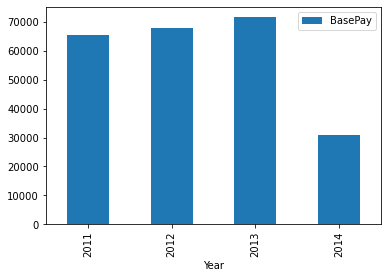

In [23]:
# plotting
u.plot(kind='bar')

In [24]:
# average base pay as per job title
round(data.groupby('JobTitle')['BasePay'].mean(),2)

JobTitle
Account Clerk                                     42804.15
Accountant                                        46643.17
Accountant I                                      67235.56
Accountant Ii                                     66224.59
Accountant Iii                                    77330.17
                                                    ...   
Worker'S Compensation Supervisor I                90966.14
X-Ray Laboratory Aide                             45311.17
Youth Comm Advisor                                41298.14
Youth Commission Advisor, Board Of Supervisors    52609.91
Zoo Curator                                       43148.00
Name: BasePay, Length: 1615, dtype: float64

In [25]:
# complete infromation about person with highest Total pay
data.iloc[data['TotalPay'].idxmax()]

EmployeeName                           Gary Jimenez
JobTitle            Captain Iii (Police Department)
BasePay                                   155966.02
OvertimePay                               245131.88
OtherPay                                  137811.38
TotalPay                                  538909.28
TotalPayBenefits                          538909.28
Year                                           2011
Name: 2, dtype: object

In [26]:
# no. of job titles
data['JobTitle'].nunique()

1615

In [27]:
# top5 most common jobs
data['JobTitle'].value_counts().head(5)

Transit Operator                7172
Registered Nurse                3709
Firefighter                     2429
Custodian                       2408
Public Svc Aide-Public Works    2251
Name: JobTitle, dtype: int64

In [28]:
# which job title has highest overtime pay
data[data['OvertimePay'] == data['OvertimePay'].max()]['JobTitle']

Id
2    Captain Iii (Police Department)
Name: JobTitle, dtype: object

In [29]:
# Number of employees per year
num_employee=data.groupby('Year')
num_employ_per_year=pd.DataFrame(num_employee.nunique()['EmployeeName'])
num_employ_per_year

,EmployeeName
Year,
2011,33878
2012,34346
2013,36147
2014,6437


<AxesSubplot:xlabel='Year'>

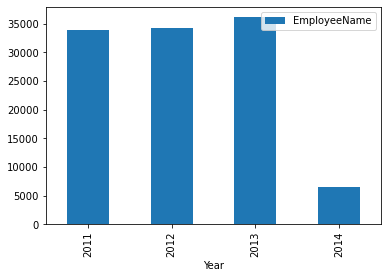

In [30]:
# visualisation
num_employ_per_year.plot(kind='bar')

<AxesSubplot:xlabel='TotalPay', ylabel='Count'>

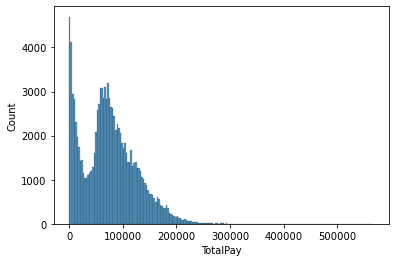

In [31]:
# histogram that shows distribution of total pay
sns.histplot(data['TotalPay'])

In [32]:
# list of people working in Police department
police_employees=data[data['JobTitle'].str.contains('Police')]
police_employees

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year
Id,,,,,,,,
2,Gary Jimenez,Captain Iii (Police Department),155966.02,245131.88,137811.38,538909.28,538909.28,2011
3,Albert Pardini,Captain Iii (Police Department),212739.13,106088.18,16452.60,335279.91,335279.91,2011
12,Patricia Jackson,Captain Iii (Police Department),99722.00,87082.62,110804.30,297608.92,297608.92,2011
16,Richard Corriea,"Commander Iii, (Police Department)",198778.01,73478.20,13957.65,286213.86,286213.86,2011
26,Gregory Suhr,Chief Of Police,256470.41,0.00,11522.18,267992.59,267992.59,2011
...,...,...,...,...,...,...,...,...
147826,Alan M Jew,Police Officer,929.70,0.00,0.00,929.70,1133.68,2014
148082,Andre G Longtin-Horton,Police Officer,619.80,0.00,0.00,619.80,755.78,2014
148083,Roger J Prieto,Police Officer,619.80,0.00,0.00,619.80,755.78,2014
